# Conducción estacionaria

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019**

- Autor: Luis M. de la Cruz Salas
- Rev: mié 24 feb 2021 14:41:27 CST

In [2]:
# Celda 1
import numpy as np
import matplotlib.pyplot as plt
import macti.visual as mvis

# Parámetros para el estilo de las gráficas
params = {'figure.figsize' : (14,7),
          'text.usetex'    : True,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'axes.labelsize' : 24,
          'axes.titlesize' : 24,
          'legend.fontsize': 24,
          'lines.linewidth': 3,
          'lines.markersize': 10,
          'grid.color'     : 'darkgray',
          'grid.linewidth' : 0.5,
          'grid.linestyle' : '--',
          'font.family': 'DejaVu Serif',
         }
plt.rcParams['axes.grid'] = False
plt.rcParams.update(params)

In [8]:
# Celda 2 : Promedio Aritmético y Media Armónica

### BEGIN SOLUTION
# Celda 2 : Promedio Aritmético y Media Armónica
def pAritmetico(a, b):
    return 0.5 * (a + b)

def mArmonica(a, b):
    return 2 * a * b / (a + b)
### EDN SOLUTION

In [19]:
# Celda 3: Completa la siguiente función 
def buildMatrix(N, k, f):
    '''
    Parameters:
    N: int Tamaño de la matriz.
    k: float Conductividad.
    f: función para calcular las conductividades
    '''
    # Matriz de ceros
    A = np.zeros((N,N))
    
    # Primer renglón
    A[0,0] = (f(k[0], k[1]) + f(k[1], k[2]))
    A[0,1] = -f(k[1], k[2])
    
    # Renglones interiores
    for i in range(1,N-1):
        A[i,i] = (f(k[i+2], k[i+1]) + f(k[i+1], k[i]))
        A[i,i+1] = -f(k[i+1], k[i+2])
        A[i,i-1] = -f(k[i+1], k[i])
        
    # Último renglón    
    A[N-1,N-2] = -f(k[N-1], k[N]) 
    A[N-1,N-1] = (f(k[N-1], k[N]) + f(k[N], k[N+1]))
    
    return A

In [20]:
# Celda 4
# Parámetros físicos
L = 1.0
bA = 2.0  # Valor de u en A (Dirichlet)
bB = 1.0  # Valor de u en B (Dirichlet)
S = 0.0

# Parámetros numéricos
N = 50 # Número de incógnitas
h = L / (N+1)
r = 1 / h**2

In [24]:
# Celda 5
# Coordenadas de los nodos
x = np.linspace(0, L, N+2)
# Conductividad variable
#k = np.abs(np.sin(4 * np.pi * x)) + 0.1
k = np.random.rand(N+2) + 0.1

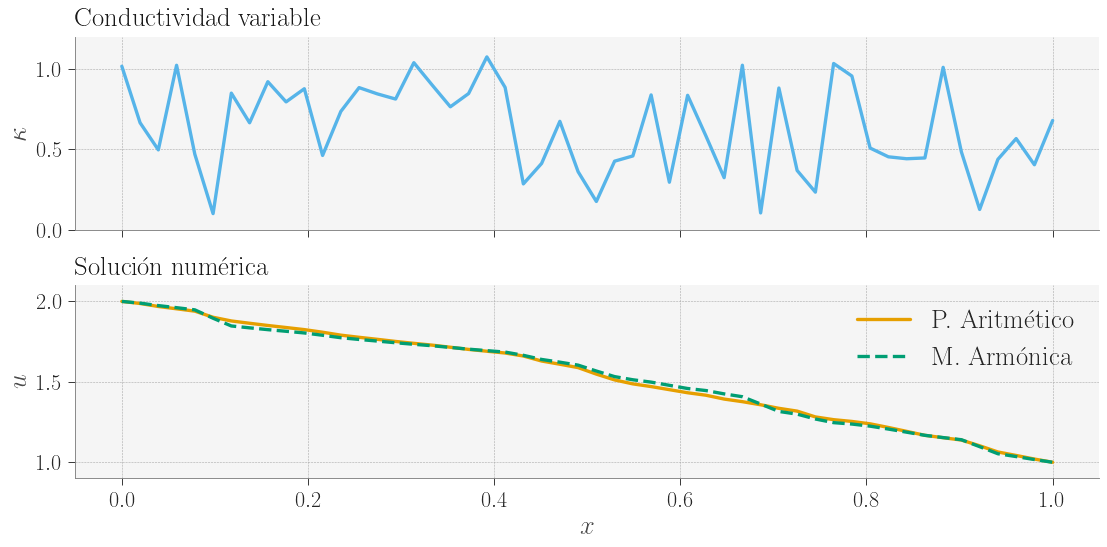

In [25]:
# Celda 6
A = buildMatrix(N, k, pAritmetico)      # Construcción de la matriz
b = np.zeros(N)                         # Lado derecho del sistema
b[1:] = S / r                           # Fuente o sumidero
b[0]  += pAritmetico(k[1], k[0]) * bA   # Condición de frontera en A
b[-1] += pAritmetico(k[N+1], k[N]) * bB # Condición de frontera en B

u1 = np.zeros(N+2) # Arreglo para almacenar la solución
u1[0] = bA         # Frontera izquierda Dirichlet
u1[-1] = bB        # Frontera derecha Dirichlet
u1[1:N+1] = np.linalg.solve(A,b)  # Sol. del sist. lineal

A = buildMatrix(N, k, mArmonica)      # Construcción de la matriz
b = np.zeros(N)                       # Lado derecho del sistema
b[1:] = S / r                         # Fuente o sumidero
b[0]  += mArmonica(k[1], k[0]) * bA   # Condición de frontera en A
b[-1] += mArmonica(k[N+1], k[N]) * bB # Condición de frontera en B

u2 = np.zeros(N+2) # Arreglo para almacenar la solución
u2[0] = bA         # Frontera izquierda Dirichlet
u2[-1] = bB        # Frontera derecha Dirichlet
u2[1:N+1] = np.linalg.solve(A,b)  # Sol. del sist. lineal

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(x,k,'C2-')
ax1.set_ylabel('$\kappa$')
ax1.set_title('Conductividad variable')
ax1.set_ylim(0.0,1.2)
ax1.grid()
ax2.plot(x,u1,'C1-', label='P. Aritmético')
ax2.plot(x,u2,'C3--', label='M. Armónica')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$u$')
ax2.legend()
ax2.set_title('Solución numérica')
ax2.set_ylim(0.9,2.1)
ax2.grid()
plt.tight_layout()
#plt.savefig('calibracion3_rand.pdf')